In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [4]:
df = pd.read_csv('tundra.tsm', delimiter='\t')  
df.to_csv('tundra.csv', index=False)

In [5]:
df.head(5)

,16.911100000000000
0,16.6333
1,16.6667
2,17.1667
3,19.2667
4,15.4000


In [50]:
import pandas as pd
df = pd.read_csv('tundra.tsm', header=None, names=['Temperature'])
years = range(1895, 1994) 
df.index = years
df.index.name = 'Year'  
df.to_csv('tundra.csv', index=True)
print(df.head())

      Temperature
Year             
1895      16.9111
1896      16.6333
1897      16.6667
1898      17.1667
1899      19.2667


In [51]:
df.head(5)

,Temperature
Year,
1895,16.9111
1896,16.6333
1897,16.6667
1898,17.1667
1899,19.2667


In [52]:
data = pd.read_csv('tundra.csv', parse_dates = True, index_col = [0]).squeeze()

In [53]:
data.head(5)

Year
1895-01-01    16.9111
1896-01-01    16.6333
1897-01-01    16.6667
1898-01-01    17.1667
1899-01-01    19.2667
Name: Temperature, dtype: float64

In [54]:
data['1991']

Year
1991-01-01    18.1889
Name: Temperature, dtype: float64

In [55]:
data.describe()

count    99.000000
mean     17.249943
std       1.210773
min      14.344400
25%      16.600000
50%      17.188900
75%      18.111100
max      19.844400
Name: Temperature, dtype: float64

In [56]:
data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 99 entries, 1895-01-01 to 1993-01-01
Series name: Temperature
Non-Null Count  Dtype  
--------------  -----  
99 non-null     float64
dtypes: float64(1)
memory usage: 1.5 KB


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 1895 to 1993
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  99 non-null     float64
dtypes: float64(1)
memory usage: 924.0 bytes


In [58]:
df.columns

Index(['Temperature'], dtype='object')

In [59]:
data.shape

(99,)

In [60]:
data.tail(5)

Year
1989-01-01    18.7667
1990-01-01    19.4889
1991-01-01    18.1889
1992-01-01    17.3889
1993-01-01    17.8222
Name: Temperature, dtype: float64

In [61]:
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')

Text(0, 0.5, 'Temperature')

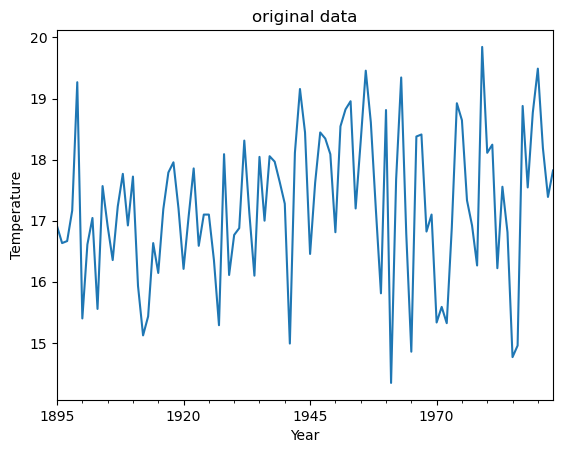

In [62]:
plt.title("original data")
data.plot()
plt.ylabel("Temperature")

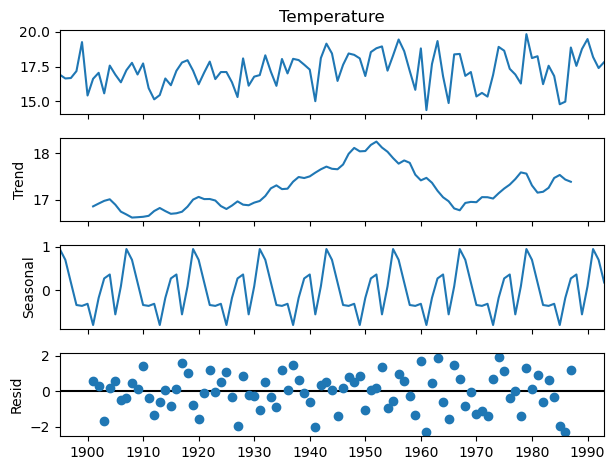

In [64]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
data.index = pd.to_datetime(data.index)
seasonal_decompose(data, model='additive', period=12).plot() 
plt.show()

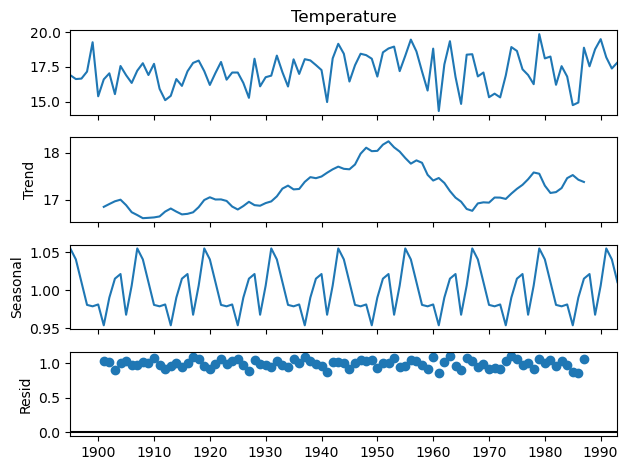

In [65]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
data.index = pd.to_datetime(data.index)
seasonal_decompose(data, model='multiplicative', period=12).plot() 
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14816\3723170730.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_downsample_two = data.resample(downsample_two).mean().copy()


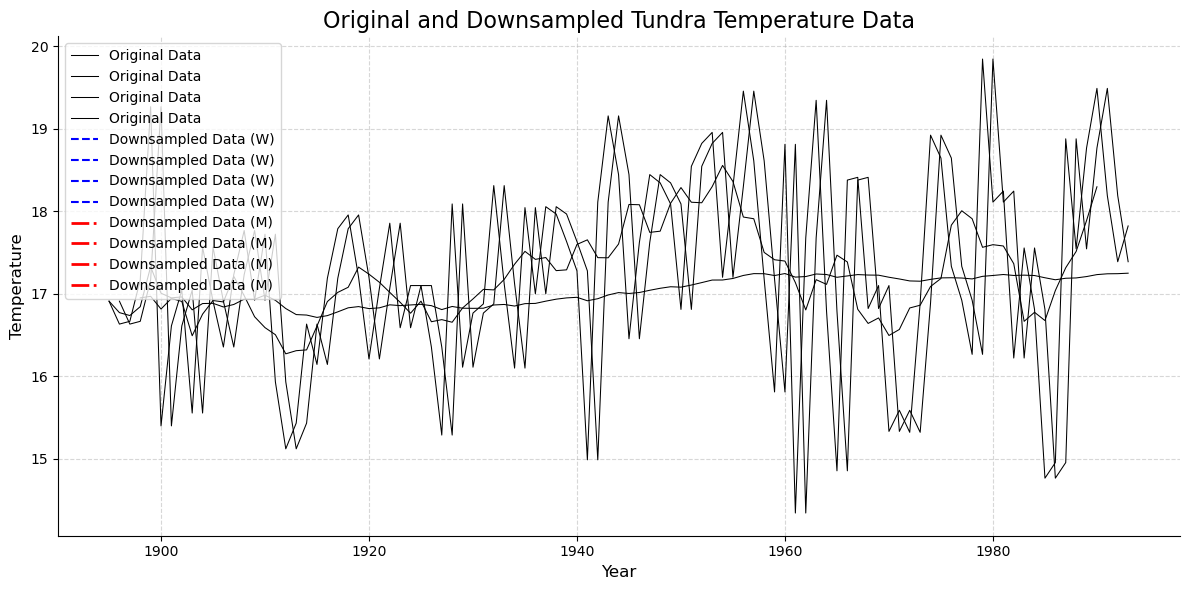

In [76]:
downsample_one = "W"  
downsample_two = "M"  

data_downsample_one = data.resample(downsample_one).mean().copy()
data_downsample_two = data.resample(downsample_two).mean().copy()
fig, ax = plt.subplots(figsize=(12, 6), dpi=100) 

ax.plot(data.index, data, label="Original Data", color="black", linewidth=0.75)
ax.plot(data_downsample_one.index, data_downsample_one, label=f"Downsampled Data ({downsample_one})", color="blue", linestyle="--", linewidth=1.5) 
ax.plot(data_downsample_two.index, data_downsample_two, label=f"Downsampled Data ({downsample_two})", color="red", linestyle="-.", linewidth=2)  
ax.grid(True, linestyle="--", alpha=0.5)  
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False)  

ax.set_title("Original and Downsampled Tundra Temperature Data", fontsize=16)
ax.set_ylabel("Temperature", fontsize=12)
ax.set_xlabel("Year", fontsize=12)
ax.legend(loc="upper left", fontsize=10) 
plt.tight_layout() 
plt.show()

            Temperature  Lag_Temperature  Rolling_Mean  Expanding_Mean
Year                                                                  
1897-01-01      16.6667              NaN           NaN       16.666700
1898-01-01      17.1667          16.6667           NaN       16.916700
1899-01-01      19.2667          17.1667           NaN       17.700033
1900-01-01      15.4000          19.2667     16.815886       17.125025
1901-01-01      16.6111          15.4000     16.944457       17.022240
1902-01-01      17.0444          16.6111     16.907943       17.025933
1903-01-01      15.5556          17.0444     16.492071       16.815886
1904-01-01      17.5667          15.5556     16.753971       16.909737
1905-01-01      16.9111          17.5667     16.919057       16.909889
1906-01-01      16.3556          16.9111     16.901600       16.854460


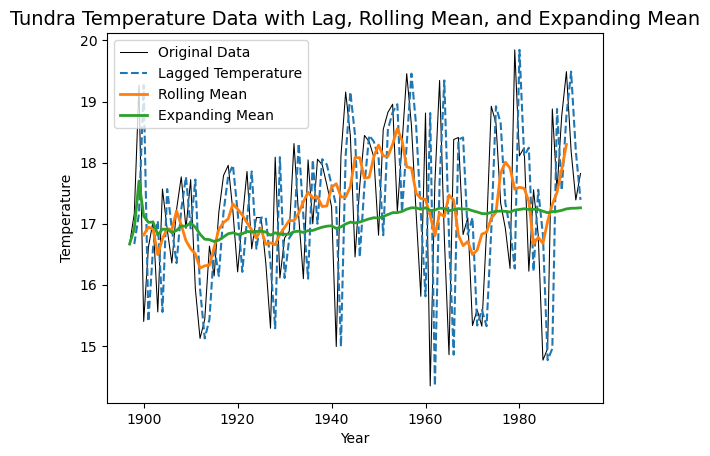

In [113]:
data = pd.DataFrame(data, columns=['Temperature'])  
data['Lag_Temperature'] = data['Temperature'].shift(1)
data['Rolling_Mean'] = data['Temperature'].rolling(window=7, center=True).mean()
data['Expanding_Mean'] = data['Temperature'].expanding().mean()  

print(data.head(10))

plt.plot(data.index, data['Temperature'], label="Original Data", color="black", linewidth=0.75)
plt.plot(data.index, data['Lag_Temperature'], label="Lagged Temperature", linestyle="--")
plt.plot(data.index, data['Rolling_Mean'], label="Rolling Mean", linewidth=2)
plt.plot(data.index, data['Expanding_Mean'], label="Expanding Mean", linewidth=2)  
plt.title("Tundra Temperature Data with Lag, Rolling Mean, and Expanding Mean", fontsize=14)
plt.ylabel("Temperature")
plt.xlabel("Year")
plt.legend()
plt.show()

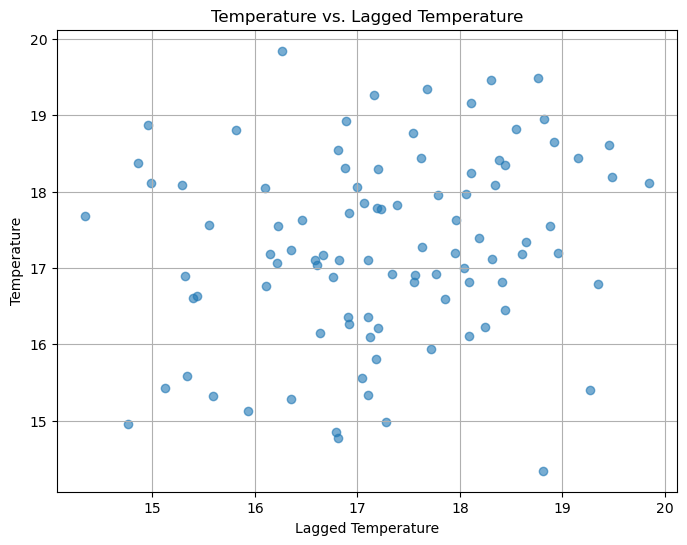

In [115]:
data['Lag_Temperature'] = data['Temperature'].shift(1) 
plt.figure(figsize=(8, 6))
plt.scatter(data['Lag_Temperature'], data['Temperature'], alpha=0.6)
plt.title("Temperature vs. Lagged Temperature")
plt.xlabel("Lagged Temperature")
plt.ylabel("Temperature")
plt.grid() 
plt.show()

<Figure size 1000x400 with 0 Axes>

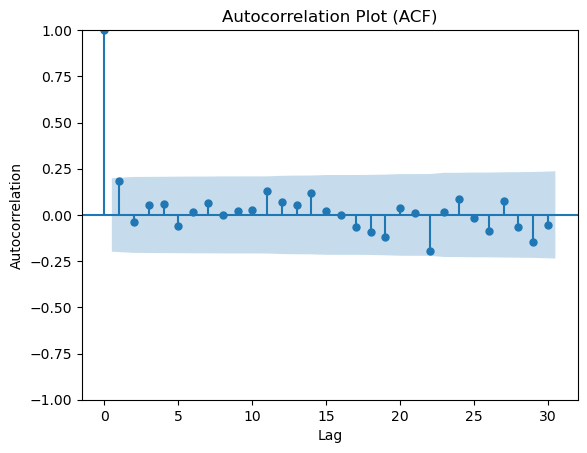

<Figure size 1000x400 with 0 Axes>

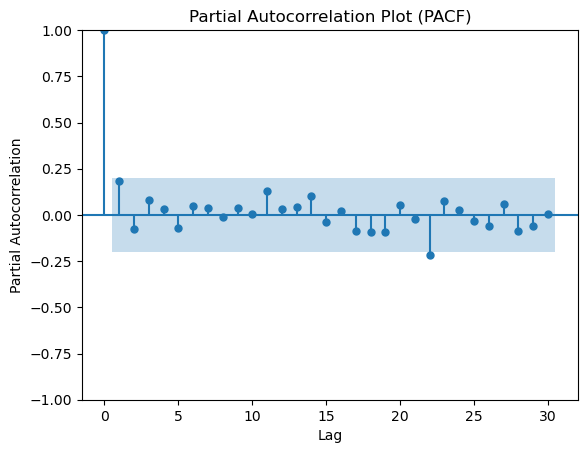

In [79]:
plt.figure(figsize=(10, 4))
plot_acf(data['Temperature'], lags=30) 
plt.title("Autocorrelation Plot (ACF)")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

plt.figure(figsize=(10, 4))
plot_pacf(data['Temperature'], lags=30) 
plt.title("Partial Autocorrelation Plot (PACF)")
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


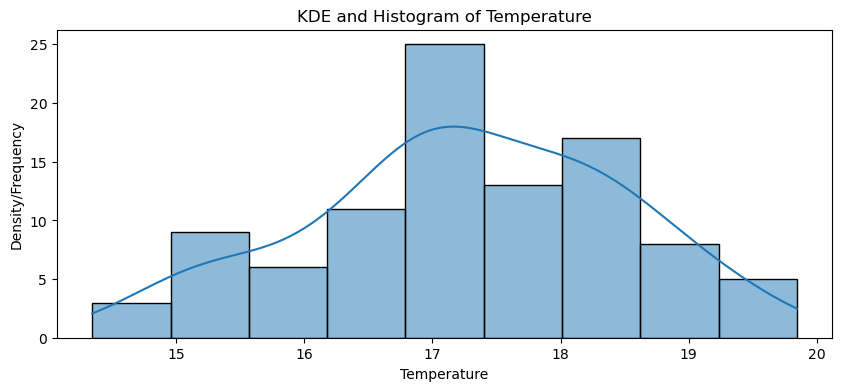

In [80]:
plt.figure(figsize=(10, 4))
sns.histplot(data['Temperature'], kde=True)  
plt.title("KDE and Histogram of Temperature")
plt.xlabel("Temperature")
plt.ylabel("Density/Frequency")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14816\3488097051.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  groups = data.groupby(pd.Grouper(freq='A'))


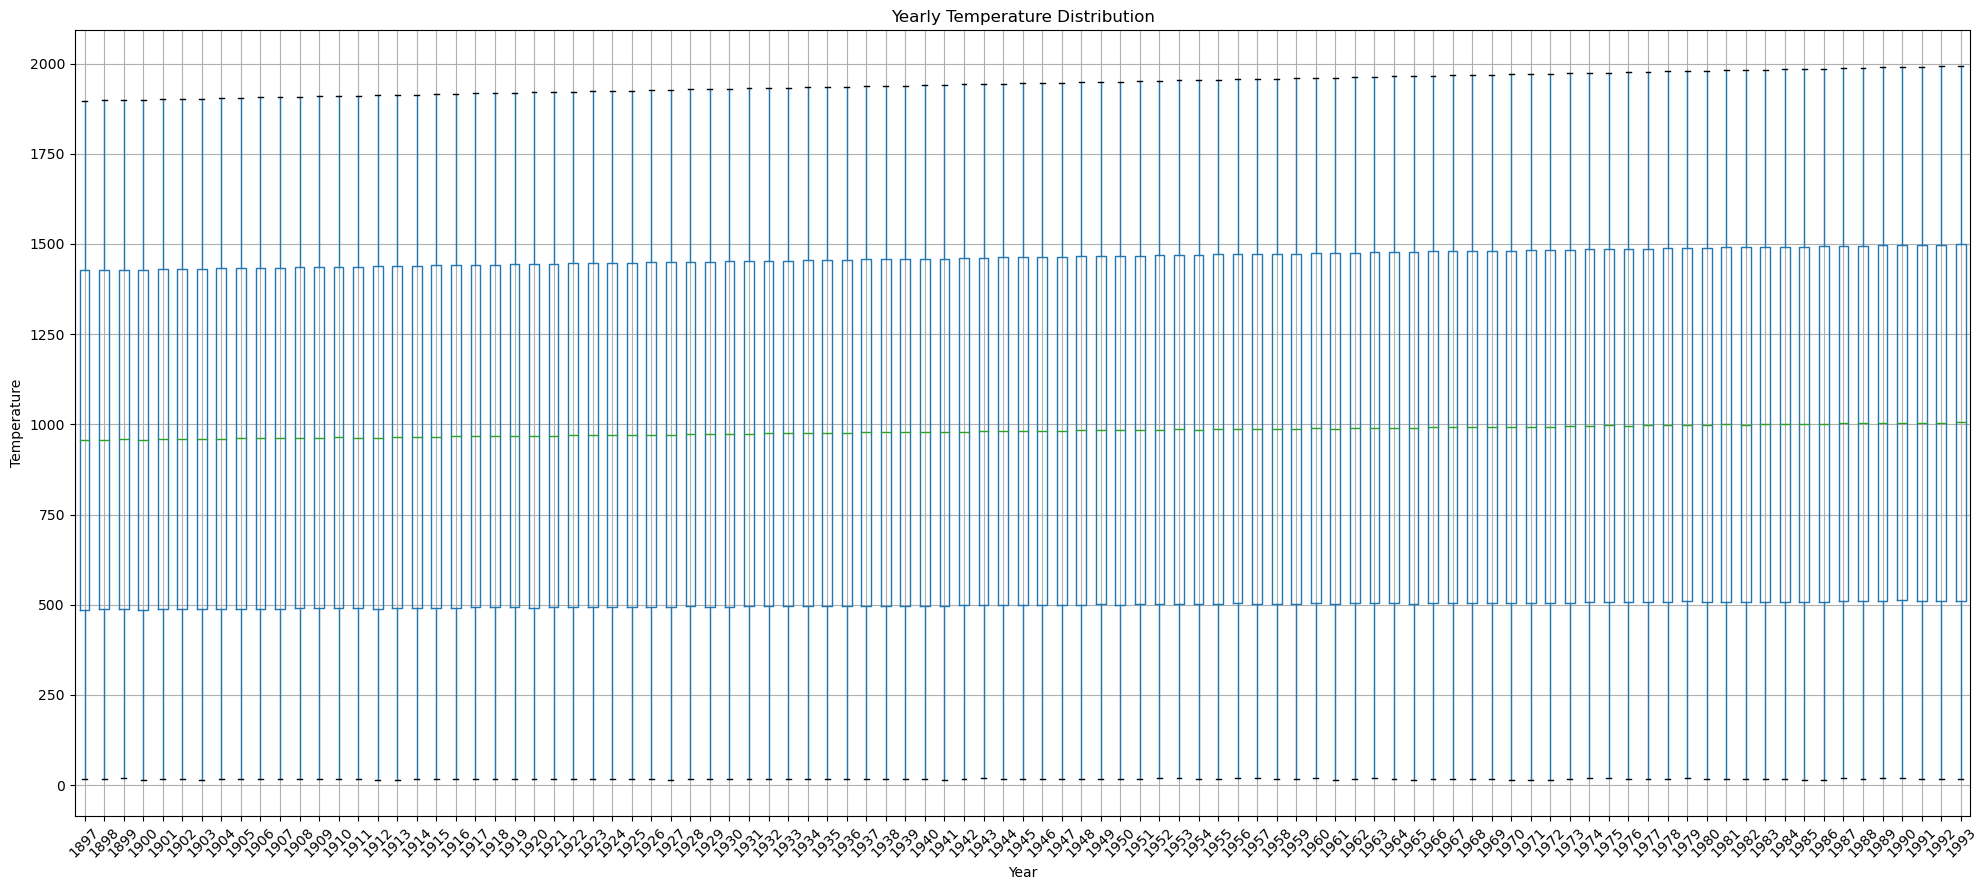

In [87]:
groups = data.groupby(pd.Grouper(freq='A')) 
years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group.values.flatten()  
plt.figure(figsize=(20,9))
years.boxplot()  
plt.title("Yearly Temperature Distribution")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

<Axes: >

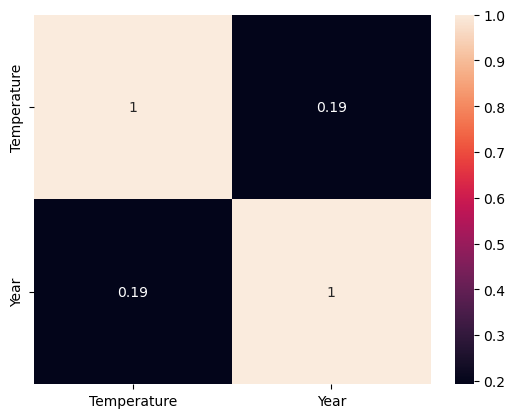

In [89]:
sns.heatmap(data.corr(), annot = True)

In [91]:
upsampled_data = data_downsample_one.resample('D').interpolate(method='linear') 
upsampled_data.head()

,Temperature,Lag_Temperature,Rolling_Mean,Expanding_Mean
Year,,,,
1895-01-06,16.911100,NaN,NaN,16.911100
1895-01-07,16.910337,NaN,NaN,16.910718
1895-01-08,16.909574,NaN,NaN,16.910337
1895-01-09,16.908810,NaN,NaN,16.909955
1895-01-10,16.908047,NaN,NaN,16.909574


In [96]:
df['Temperature'].mean()

17.249943434343436

In [99]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['Temperature'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[1] <= 0.05:
    print("the data is stationary.")
else:
    print("the data is non-stationary.")

ADF Statistic: -8.057151327107954
p-value: 1.680578184681823e-12
Critical Values:
	1%: -3.500
	5%: -2.892
	10%: -2.583
the data is stationary.


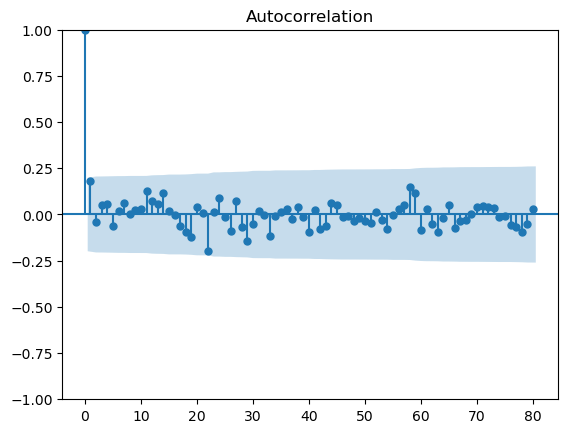

In [102]:
plot_acf(data['Temperature'], lags=80)
plt.show()

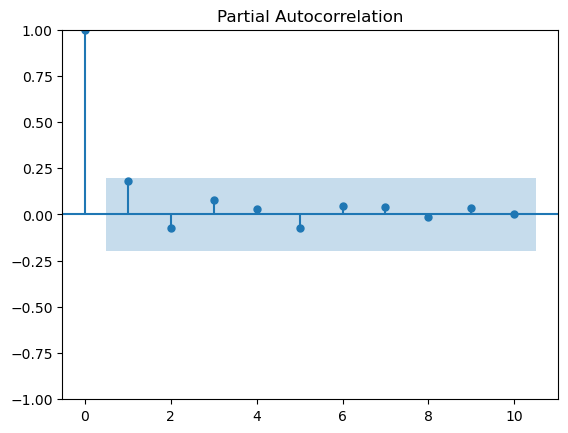

In [104]:
plot_pacf(data['Temperature'], lags=10)
plt.show()

In [106]:
model = ARIMA(data['Temperature'], order=(2, 0, 1))  
fit = model.fit()
print(fit.summary())

                               SARIMAX Results                                
Dep. Variable:            Temperature   No. Observations:                   97
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -154.537
Date:                Fri, 18 Apr 2025   AIC                            319.073
Time:                        10:36:20   BIC                            331.947
Sample:                    01-01-1897   HQIC                           324.279
                         - 01-01-1993                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.2594      0.154    112.156      0.000      16.958      17.561
ar.L1         -0.7999      0.114     -7.023      0.000      -1.023      -0.577
ar.L2          0.1672      0.112      1.493      0.1

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


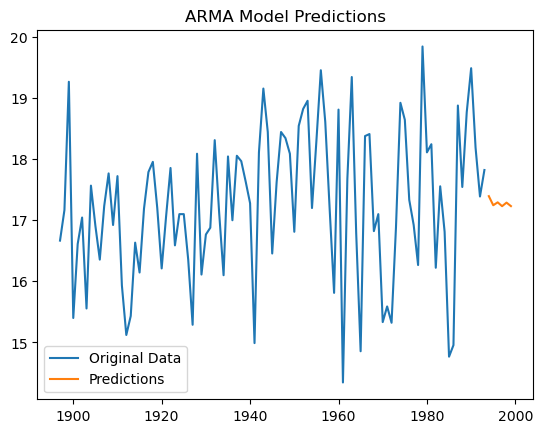

In [109]:
predictions = fit.predict(start=len(data), end=len(data) + 5)
plt.plot(data['Temperature'], label='Original Data')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.title('ARMA Model Predictions')
plt.show()

In [112]:
model = ARIMA(data['Temperature'], order=(2, 0, 1))  
model_fit = model.fit() 
mle_estimates = model_fit.params
print("MLE Estimates:", mle_estimates)

MLE Estimates: const     17.259444
ar.L1     -0.799861
ar.L2      0.167217
ma.L1      0.999958
sigma2     1.403771
dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
